In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import pylab
import seaborn as sns
import random
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pingouin as pg

In [2]:
df = pd.read_csv('Stroke_data_cleaned.csv')

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
1,1,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
2,2,Female,52.0,0.0,0.0,Yes,Private,Urban,77.59,17.7,formerly smoked,0.0
3,3,Female,75.0,0.0,1.0,Yes,Self-employed,Rural,243.53,27.0,never smoked,0.0
4,4,Female,32.0,0.0,0.0,Yes,Private,Rural,77.67,32.3,smokes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28911,29060,Female,10.0,0.0,0.0,No,children,Urban,58.64,20.4,never smoked,0.0
28912,29061,Female,56.0,0.0,0.0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0.0
28913,29062,Female,82.0,1.0,0.0,Yes,Private,Urban,91.94,28.9,formerly smoked,0.0
28914,29063,Male,40.0,0.0,0.0,Yes,Private,Urban,99.16,33.2,never smoked,0.0


Text(0.5, 0, 'chart of the average glucose levels in our sample')

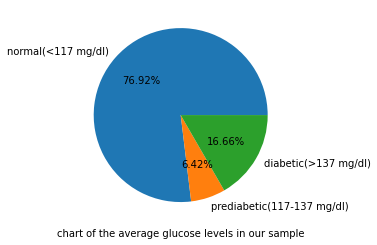

In [67]:
x1 = df.loc[df['avg_glucose_level'] < 117] #normal
x2 = df.loc[(df['avg_glucose_level'] >= 117) & (df['avg_glucose_level'] <= 137)] #prediabetic
x3 = df.loc[df['avg_glucose_level'] > 137] #diabetic

x = [x1.shape[0], x2.shape[0], x3.shape[0]]
mylabels = ["normal(<117 mg/dl)", "prediabetic(117-137 mg/dl)", "diabetic(>137 mg/dl)"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('chart of the average glucose levels in our sample' )

In [79]:
df['avg_glucose_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28916 entries, 0 to 28915
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
28916 non-null  float64
dtypes: float64(1)
memory usage: 226.0 KB


In [121]:
df_sample = df['avg_glucose_level'].sample(28000)
statistic, p = ttest_1samp(df_sample, 126)
print('one sample t test','statistic=%0.3f, p-value = %0.3f\n' % (statistic, p))

one sample t test statistic=-72.803, p-value = 0.000



In [122]:
m1 = df_sample.mean()
m2 = 126
s = df_sample.std()
ef = abs(m1-m2)/s
ef

0.4350814160324605

In [123]:
power_analysis = smp.TTestIndPower()

p = power_analysis.solve_power(effect_size = ef, nobs1 = 20, alpha = 0.05)
print('one sample t test','power = %0.3f\n' % (p))

one sample t test power = 0.269



In [316]:
df_rural = df.loc[df['Residence_type'] == 'Rural'].avg_glucose_level
df_urban = df.loc[df['Residence_type'] == 'Urban'].avg_glucose_level.sample(df_rural.size)

ttest_ind(df_rural, df_urban)

Ttest_indResult(statistic=0.531557057391385, pvalue=0.5950369146264631)

In [317]:
n1, n2 = df_urban.size, df_rural.size
s1, s2 = np.std(df_urban), np.std(df_rural)
v1, v2 = s1**2, s2**2
s = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))
m1, m2 =  df_urban.mean(),  df_rural.mean()
d = print(np.abs((m1-m2)/s))

0.006265547860999544


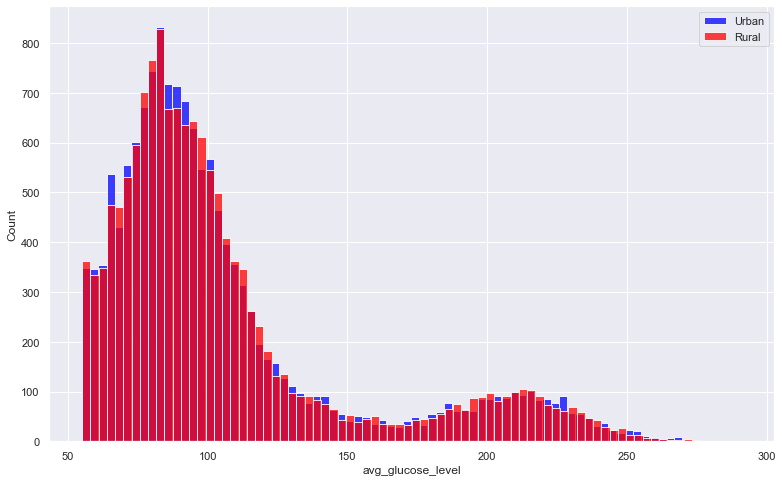

In [318]:
sns.set()
sns.histplot(data=df_urban, color="blue", label="Urban")
sns.histplot(data=df_rural, color="red", label="Rural")
plt.legend()

In [320]:
power_analysis = smp.TTestIndPower()
power_analysis.solve_power(effect_size = 0.005460307316093725, nobs1 = df_urban.size, alpha = 0.05)

0.07492497590773514

In [322]:
power_analysis = smp.TTestIndPower()
power_analysis.solve_power(effect_size = 0.005460307316093725, nobs1 = df_urban.size, alpha = 0.3)

0.3501092688961499

In [48]:
#independant t-test
# there is a difference in mean bmi between men and women, H1 accepted
df_male_bmi = df.loc[df['gender'] == 'Male'].bmi
df_female_bmi = df.loc[df['gender'] == 'Female'].bmi.sample(11145)

ttest_ind(df_male_bmi,df_female_bmi)

Ttest_indResult(statistic=2.9681133468152816, pvalue=0.0029995228273733687)

In [32]:
#independant t-test
#there is no statisitcal difference between mean bmi between men and women, H0 accepted
df_male_bmi = df.loc[df['gender'] == 'Male'].bmi.sample(50)
df_female_bmi = df.loc[df['gender'] == 'Female'].bmi.sample(50)

ttest_ind(df_male_bmi,df_female_bmi)

Ttest_indResult(statistic=0.3875381819800312, pvalue=0.6991982343470753)

In [134]:
# calculating effect size using Cohen's d
df_male_bmi = df.loc[df['gender'] == 'Male'].bmi.sample(445)
df_female_bmi = df.loc[df['gender'] == 'Female'].bmi.sample(445)

In [135]:
n1, n2 = df_male_bmi.size, df_female_bmi.size
s1, s2 = np.std(df_male_bmi), np.std(df_female_bmi)
v1, v2 = s1**2, s2**2
s = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))
m1, m2 =  df_male_bmi.mean(),  df_female_bmi.mean()
d = print(np.abs((m1-m2)/s))

0.15982128710067434


In [20]:
## calculating the power

power_analysis = smp.TTestIndPower()

p = power_analysis.solve_power(effect_size = 0.159, nobs1 = 445, alpha = 0.05)
sample_size = power_analysis.solve_power(effect_size = 0.18, power = 0.8, alpha = 0.05)

In [242]:
## Anova one way 

#the avergae glucose level for all job types is equal
df_govt = df.loc[df['work_type'] == 'Govt_job']
df_private = df.loc[df['work_type'] == 'Private'].sample(df_govt.shape[0])
df_self = df.loc[df['work_type'] == 'Self-employed'].sample(df_govt.shape[0])

In [243]:
df_sample1 = df_govt.append(df_private,ignore_index=True)
df_sample = df_sample1.append(df_self,ignore_index=True)

<ipython-input-243-52b70c6fe7d5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample1 = df_govt.append(df_private,ignore_index=True)
<ipython-input-243-52b70c6fe7d5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample = df_sample1.append(df_self,ignore_index=True)


In [276]:
model = ols('avg_glucose_level ~ (work_type)', data=df_sample).fit()
sm.stats.anova_lm(model, typ=2)
pt = print(pg.pairwise_tukey(dv='avg_glucose_level', between='work_type', effsize ='eta-square', data= df_sample))

          A              B     mean(A)     mean(B)      diff        se  \
0  Govt_job        Private  107.060897  105.002986  2.057911  1.025068   
1  Govt_job  Self-employed  107.060897  112.632405 -5.571508  1.025068   
2   Private  Self-employed  105.002986  112.632405 -7.629419  1.025068   

          T       p-tukey  eta-square  
0  2.007586  1.103899e-01    0.000530  
1 -5.435258  1.670064e-07    0.003281  
2 -7.442844  0.000000e+00    0.006481  


In [306]:
#calculating effect size for one way anova 

#effect size f = sqrt(eta^2/(1-eta^2))

aov = pg.anova(dv = 'avg_glucose_level', between='work_type', data=df_sample, detailed =True)
aov['power'] = [p, 'NaN']
aov

,Source,SS,DF,MS,F,p-unc,np2,power
0,work_type,1.302242e+05,2,65112.108058,29.656121,1.415429e-13,0.00471,0.057017
1,Within,2.751928e+07,12534,2195.570640,NaN,NaN,NaN,NaN


In [250]:
stats.f_oneway(df_private.avg_glucose_level, df_self.avg_glucose_level, df_govt.avg_glucose_level)


F_onewayResult(statistic=29.65612076843996, pvalue=1.415429253578426e-13)

In [251]:
# calculating  power for one way anova 

power_analysis = smp.FTestAnovaPower()
p = power_analysis.solve_power(effect_size=0.2, nobs=10,  alpha=0.05, power=None, k_groups=3)

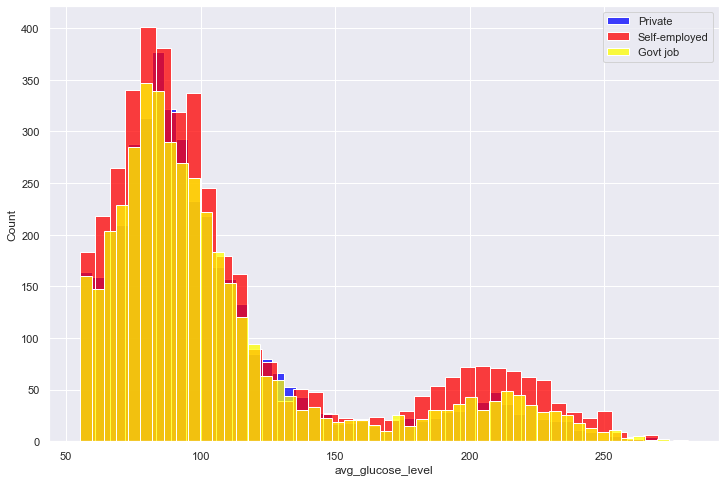

In [283]:
sns.set()
sns.histplot(data=df_private.avg_glucose_level, color="blue", label="Private")
sns.histplot(data=df_self.avg_glucose_level, color="red", label="Self-employed")
sns.histplot(data=df_govt.avg_glucose_level, color="yellow", label="Govt job")
plt.legend()
sns.set(rc={'figure.figsize':(13,8)})

Text(0.5, 0, 'Gender distribution in our sample')

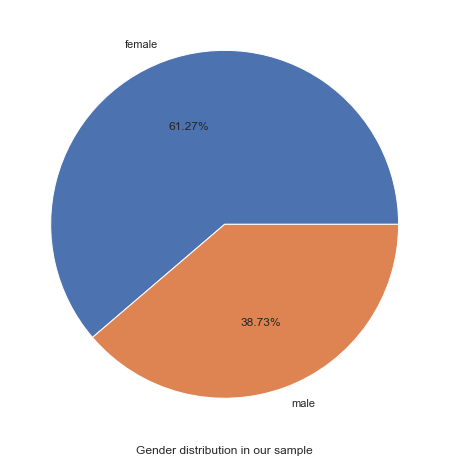

In [286]:
#Two way anova 
x = df_sample.gender.value_counts()
mylabels = ["female", "male"]
plt.pie(x, labels = mylabels, autopct='%1.2f%%')
plt.xlabel('Gender distribution in our sample')


In [288]:
df_sample_male = df_sample.loc[df_sample['gender'] == 'Male']
df_sample_female = df_sample.loc[df_sample['gender'] == 'Female'].sample(df_sample_male.shape[0])

In [293]:
df_sample_female
df_sample_male
df_sample2 = df_sample_male.append(df_sample_female, ignore_index=True)
df_sample2

<ipython-input-293-0455db355a88>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample2 = df_sample_male.append(df_sample_female, ignore_index=True)


,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31,Male,58.0,1.0,0.0,Yes,Govt_job,Rural,56.96,26.8,smokes,0.0
1,48,Male,27.0,0.0,0.0,No,Govt_job,Urban,95.10,24.3,formerly smoked,0.0
2,62,Male,64.0,0.0,0.0,Yes,Govt_job,Urban,239.64,34.6,formerly smoked,0.0
3,90,Male,56.0,0.0,0.0,Yes,Govt_job,Rural,73.02,31.1,never smoked,0.0
4,93,Male,53.0,1.0,1.0,Yes,Govt_job,Rural,109.51,41.9,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9707,4477,Female,38.0,0.0,0.0,No,Govt_job,Rural,122.71,50.5,formerly smoked,0.0
9708,25500,Female,76.0,0.0,0.0,Yes,Private,Rural,143.22,24.4,smokes,0.0
9709,25998,Female,77.0,0.0,0.0,Yes,Self-employed,Rural,187.28,27.9,formerly smoked,0.0
9710,16450,Female,44.0,0.0,0.0,No,Govt_job,Urban,67.09,31.2,smokes,0.0


In [310]:
#Two way anova >> can calculate effect size and power 
aov = pg.anova(dv = 'avg_glucose_level', between=['work_type','gender'], data=df_sample2, detailed =True)
etaa = aov['np2'][0:3]
f0 = np.sqrt(etaa[0]**2/(1-etaa[0]**2))
f1 = np.sqrt(etaa[1]**2/(1-etaa[1]**2))
f2 = np.sqrt(etaa[2]**2/(1-etaa[2]**2))

power_analysis = smp.FTestAnovaPower()
p0 = power_analysis.solve_power(effect_size=f0, nobs=df_sample_male.shape[0],  alpha=0.05, power=None, k_groups=3)
p1 = power_analysis.solve_power(effect_size=f1, nobs=df_sample_male.shape[0],  alpha=0.05, power=None, k_groups=3)
p2 = power_analysis.solve_power(effect_size=f2, nobs=df_sample_male.shape[0],  alpha=0.05, power=None, k_groups=3)
aov['power'] = [p0,p1,p2,'NaN']
aov

,Source,SS,DF,MS,F,p-unc,np2,power
0,work_type,1.153083e+05,2.0,57654.131402,25.497339,9.028887e-12,0.005226,0.060089
1,gender,5.744784e+04,1.0,57447.838942,25.406107,4.728265e-07,0.002611,0.052488
2,work_type * gender,1.929925e+03,2.0,964.962360,0.426751,6.526381e-01,0.000088,0.050003
3,Residual,2.194704e+07,9706.0,2261.182296,NaN,NaN,NaN,NaN


In [315]:
print(pg.pairwise_tukey(dv='avg_glucose_level', between=['gender'], effsize ='eta-square', data= df_sample2))
#print(pg.pairwise_tukey(dv='avg_glucose_level', between=['work_type'], effsize ='eta-square', data= df_sample2))


        A     B     mean(A)     mean(B)      diff        se         T  \
0  Female  Male  106.478812  111.406316 -4.927504  0.967411 -5.093498   

        p-tukey  eta-square  
0  3.581181e-07    0.002664  
